# Project: Ford GoBike System Data
## (January 2018 - December 2018)

### by Mohamed.elhaddad 

## Table of Contents
- [Introduction](#intro)
- [wrangling](#wrangling)
- [Cleaning](#clean)
- [Univariate Exploration](#univariate)
- [Bivariate Explorationn](#bivariate)
- [Multivariate Exploration](#multivariate)
- [Summary](#summary).

<a id='intro'></a>
## Introduction
> This document explores a data set containing UFord GoBike System Data. There are approximately "174952" rides made
in a bike-sharing system covering the greater San Francisco
Bay area in the set.


<a id='wrangling'></a>
## Data Wrangling
> In this step we will import libraries wich will help us in our analysis and explore our data to know what operation we need to do to make our data clean and tidy .

In [1]:
# importing important libraries 
import pandas as pd 
import numpy as np 
import seaborn as sb 
import matplotlib.pyplot as plt 
from datetime import datetime, timedelta
%matplotlib inline 

In [2]:
# read data_set and make copy to save it 
df_r = pd.read_csv("Data//201902-fordgobike-tripdata.csv")
df = df_r.copy()

In [3]:
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
123070,528,2019-02-11 09:51:17.5370,2019-02-11 10:00:05.7360,61.0,Howard St at 8th St,37.776513,-122.411306,74.0,Laguna St at Hayes St,37.776435,-122.426244,4741,Subscriber,1960.0,Male,No
171721,499,2019-02-03 19:17:02.0570,2019-02-03 19:25:21.8190,105.0,16th St at Prosper St,37.764285,-122.431804,75.0,Market St at Franklin St,37.773793,-122.421239,4370,Subscriber,1981.0,Male,No
36267,1887,2019-02-23 16:11:27.5510,2019-02-23 16:42:54.8770,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,200.0,2nd Ave at E 18th St,37.800214,-122.253810,6422,Customer,1992.0,Male,No
10010,329,2019-02-27 22:16:03.2250,2019-02-27 22:21:32.5710,243.0,Bancroft Way at College Ave,37.869360,-122.254337,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,6385,Subscriber,1991.0,Male,No
11172,354,2019-02-27 19:00:34.1310,2019-02-27 19:06:28.9720,182.0,19th Street BART Station,37.809013,-122.268247,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,5721,Subscriber,1988.0,Male,No
106314,634,2019-02-13 18:22:01.2450,2019-02-13 18:32:35.4480,101.0,15th St at Potrero Ave,37.767079,-122.407359,108.0,16th St Mission BART,37.764710,-122.419957,1202,Subscriber,1980.0,Female,No
75592,575,2019-02-19 08:56:27.6870,2019-02-19 09:06:03.3110,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,81.0,Berry St at 4th St,37.775880,-122.393170,1196,Subscriber,1992.0,Female,No
15530,955,2019-02-27 09:12:27.3300,2019-02-27 09:28:23.2490,19.0,Post St at Kearny St,37.788975,-122.403452,79.0,7th St at Brannan St,37.773492,-122.403673,5907,Subscriber,1986.0,Female,No
128617,2497,2019-02-10 12:17:20.3200,2019-02-10 12:58:57.4370,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,5218,Subscriber,1998.0,Male,No
50850,1136,2019-02-21 18:26:48.8640,2019-02-21 18:45:45.2390,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,154.0,Doyle St at 59th St,37.841924,-122.288045,4891,Subscriber,1989.0,Male,No


In [4]:
# showing important information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
#getting some additional description for stats figures
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
# find duplicates
df.duplicated().sum()
# No duplicates here 

0

In [7]:
# What about NaN values?
df.isnull().sum() 

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

<a id='clean'></a>
## Inrtodutory cleaning 
there are some quality issues that need to be cleaned :
- missing values(start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender)
- Start/end times are not in the timestamp format
- The following columns are not in object format: 
  - start_station_id
  - end_station_id
  - bike_id
- Member birth is in the float format, but should be converted to integer format

In [8]:
# Drop missing values 
df.dropna(inplace=True)

In [9]:
# Changing the format to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [10]:
# Changing the user_type, member_gender, and bike_share_for_all_trip to category format
df.user_type = df.user_type.astype('category')
df.member_gender = df.member_gender.astype('category')
df.bike_share_for_all_trip = df.bike_share_for_all_trip.astype('category')

In [11]:
# Changing the bike_id, start_station_id, and end_station_id to object
df['start_station_id'] = df['start_station_id'].astype(str)
df['end_station_id'] = df['end_station_id'].astype(str)
df['bike_id'] = df['bike_id'].astype(str)

In [12]:
# getting the ages of the members and convert it to integer 
df['Age'] = 2021 - df['member_birth_year']
df['Age'] = df['Age'].astype(int)

In [13]:
# converting it to integer
df.member_birth_year = df.member_birth_year.astype(int)

In [14]:
# what is the average of ages ? 
df.Age.mean()

36.196865425945404

In [15]:
df.Age.describe(percentiles = [.99])
# So it looks like 99% of users are under the age of 66

count    174952.000000
mean         36.196865
std          10.118731
min          20.000000
50%          34.000000
99%          66.000000
max         143.000000
Name: Age, dtype: float64

In [16]:
# Only keep the events where riders were under 66 years of age
df = df.query('Age <= 66')

In [17]:
# Start time month (January - December)
df['start_time_month'] = df['start_time'].dt.strftime('%B')

In [18]:
# Start time month (1-12)
df['start_time_month_num'] = df['start_time'].dt.month.astype(int)

In [19]:
# Start time weekday
df['start_time_weekday'] = df['start_time'].dt.strftime('%A')

In [20]:
# Start and end time hour
df['start_time_hour'] = df['start_time'].dt.hour
df['end_time_hour'] = df['end_time'].dt.hour

In [21]:
# Duration in seconds to duration in minutes
df['duration_min'] = df['duration_sec']/60
df['duration_min'] = df['duration_min'].astype(int)

In [22]:
# Not important columns 
df.drop(['start_station_latitude', 'start_station_longitude','end_station_latitude','end_station_longitude', 'member_birth_year'], axis=1, inplace=True)

### What is the structure of your dataset?

> There are 174952 columns for Ford GoBike System in a bike-sharing system wich covering the greater San Francisco
Bay area,  with 17 features, including duration_sec, start_time, end_time, end_time, start_station_id, start_station_nam,  start_station_latitude  start_station_longitude     end_station_id            end_station_name          end_station_latitude     end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip, Age and month .           

### What is/are the main feature(s) of interest in your dataset?

> The main features include data related to the start and end of a ride. This can be used to calculate when bikes are in high or low demand. There is also ample data related to the users of the bike service including their age, gender, and whether they are a paying member or a casual user.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The start and end times, and related time-based information will be be usedheavily

<a id='univariate'></a>
## Univariate Exploration

> In this section,  I investigate the distributions of individual variables of interest. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [23]:
# Setting color 
color = sb.color_palette()[0]

### What is the ditripution of week-day usage? 

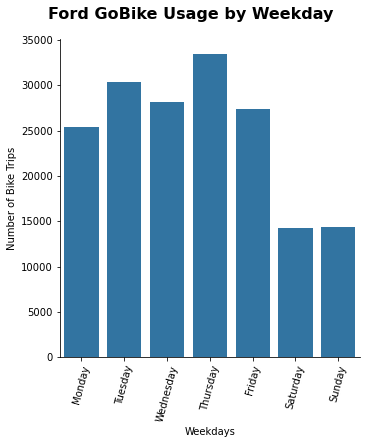

In [24]:
# Weekday usage of the Ford Go bike system
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plot = sb.catplot(data=df, x='start_time_weekday', kind='count', color = color, order = weekday)

plot.set_axis_labels('Weekdays', 'Number of Bike Trips')

plot.fig.suptitle('Ford GoBike Usage by Weekday', y=1.05, fontsize=16, fontweight='bold');

plot.set_xticklabels(rotation=75);

>Observation(1): Tuesdays and Wednesdays are the most popular days for using the bike sharing system, however Thursdays, Mondays and Fridays are very close to the Tues/Weds numbers , saturday and sunday are not popular as the rest of days.

### What is the ditripution useage by hour ? 

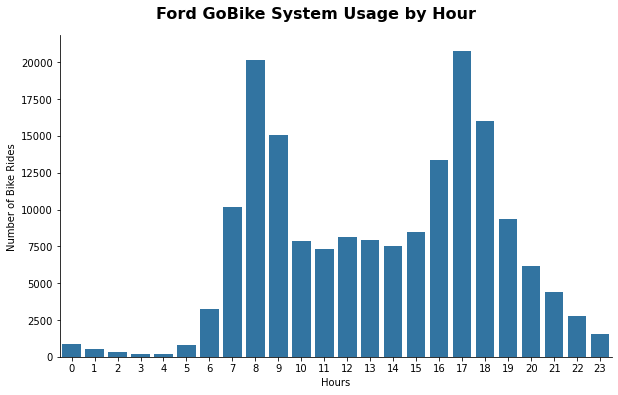

In [25]:
# Hourly usage of the Ford Go Bike System
plot = sb.catplot(data = df, x='start_time_hour', kind='count', color = color, aspect = 1.7)
plot.set_axis_labels('Hours', 'Number of Bike Rides')
plot.fig.suptitle('Ford GoBike System Usage by Hour', y=1.05, fontsize=16, fontweight='bold');

> Observation(2): The most usage during the morning hours of 8-9am, and in the afternoon hours of 5-6pm

### What is the ditripution of Ages  ? 

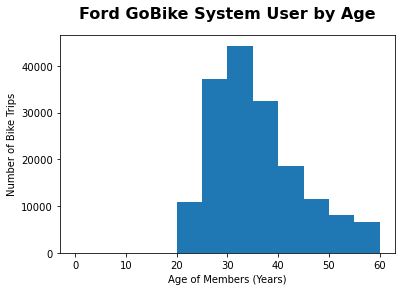

In [26]:
# Age group data
bin_edges = np.arange(0, 65, 5)
plt.hist(data = df, x = 'Age', bins = bin_edges);
plt.title("Ford GoBike System User by Age", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Age of Members (Years)')
plt.ylabel('Number of Bike Trips');

>Observation(3): The mean age of a user is 35.5 years old.

### What is the ditripution of Gender ? 

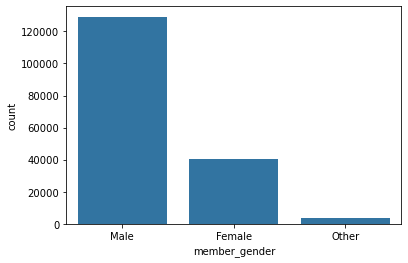

In [27]:
# Gender data 
o = df.member_gender.value_counts().index
sb.countplot(data=df , x='member_gender' , color=color , order=o);

>Observation(4): Most of the users of this system are male.

### What is the ditripution of user type  ? 

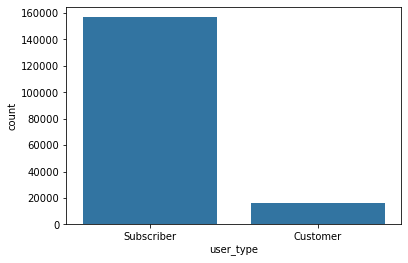

In [28]:
# Types of users 
o = df.user_type.value_counts().index
sb.countplot(data=df , x='user_type' , color=color , order=o);

> Observation(5): Most of the users of this system are subscribers.

### What is the most popular Start stations ? 

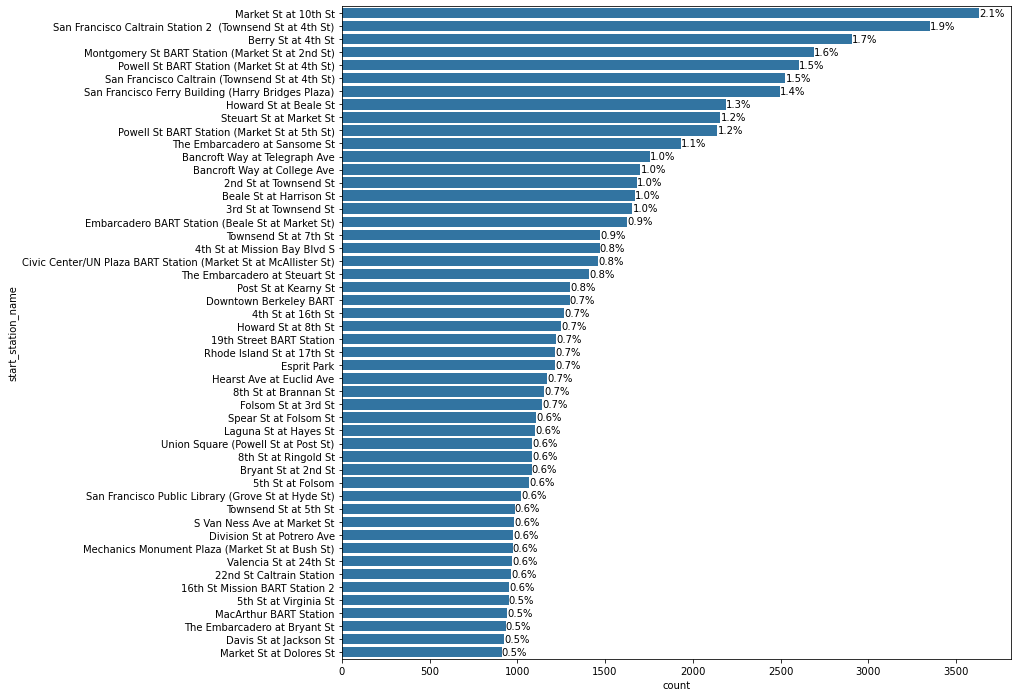

In [29]:
# Most popular Start station 
fig_dims = (12, 12)
fig, ax = plt.subplots(figsize=fig_dims)
c = sb.color_palette()[0]
o = df.start_station_name.value_counts().head(50).index
sb.countplot(data=df , y='start_station_name' , color=c , order=o);

# Putting percentage  
start_counts = df.start_station_name.value_counts().head(50)
for i in range(start_counts.shape[0]):
  count = start_counts[i]
  pct_string = '{:0.1f}%'.format(100*count/df.shape[0])
  plt.text(count+1, i, pct_string, va = 'center');

> Observation(6): The most popular stations to start are Market St and San francisco caltrian station 2 

## Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Thanks to the - [Cleaning](#clean)  process, discovering the parameter distributions was extremely easy


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distribution of the trip duration was a little surprising at first plotting out the original dataو Nothing seems out of the normal.


<a id='bivariate'></a>
## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in the flights
data. First, I am going to make a data frame that include only the data need for this study. I will also create calculated columns in this data frame so that I can use it in multivariate exploration as well.

### What is the relation between week-day and number  of trips depending on  user type  ? 

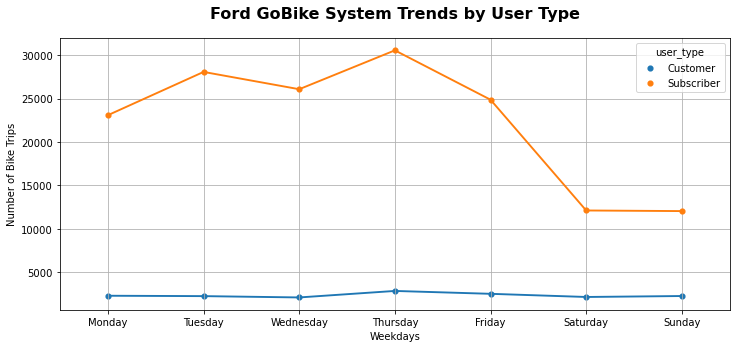

In [30]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.figure(figsize=(12, 5))

df_user_week = df.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax = sb.pointplot(data=df_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Ford GoBike System Trends by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');
plt.grid()

>Observation(1): Customers have a relatively low usage of the bike share system with a small increase on the weekends. Subscribers are the opposite

### What is the relation between Ages and Time of trip  ? 

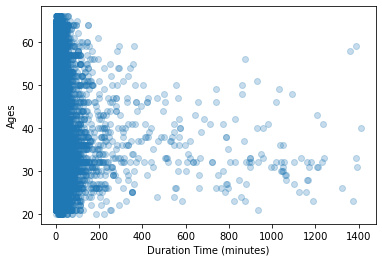

In [31]:
# plotting relation between ages and time tripping 
plt.scatter(data=df, x='duration_min' ,y='Age', alpha=5/20);
plt.xlabel('Duration Time (minutes)')
plt.ylabel('Ages');

> Observation(2): we notice that all of ages prefer to spend thier trips less than 200 minutes 

### What is the relation between ages and type of user   ? 

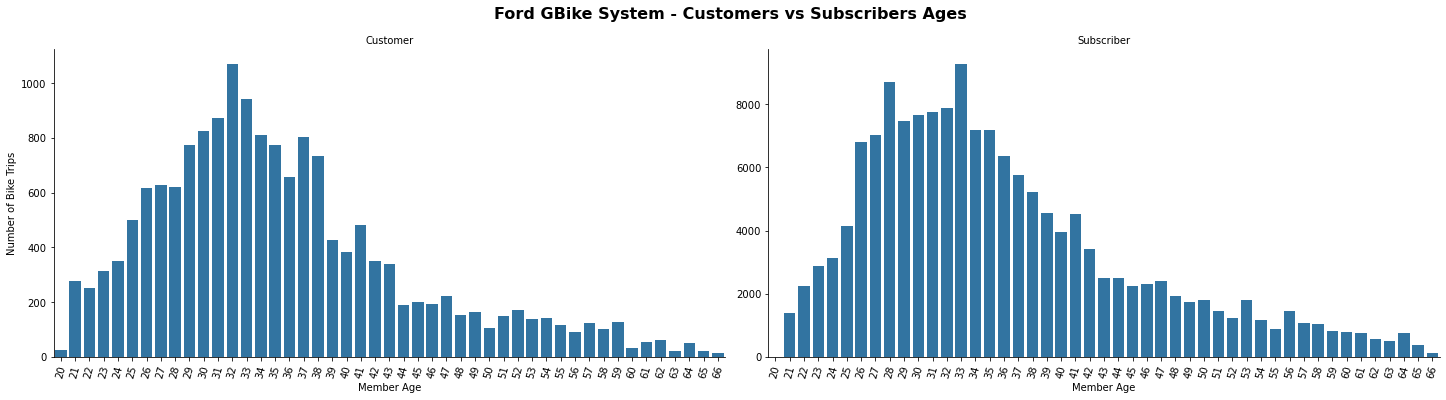

In [32]:
# Customer vs Subscriber Usage by Age
plot = sb.catplot(data = df, x = 'Age', col='user_type', kind='count', sharey = False, color = color, height=5, aspect=2)
plot.set_axis_labels('Member Age', 'Number of Bike Trips')
plot.set_titles('{col_name}')
plot.fig.suptitle('Ford GBike System - Customers vs Subscribers Ages', y=1.05, fontsize=16, fontweight='bold');
plot.set_xticklabels(rotation=75);

>Observation(3): Subscribers have a wider range of ages while Customers tends to have mostly younger users (most are und the 31 threshold) 

### What is the relation between Age and Gender  ? 


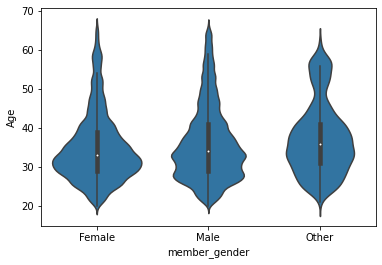

In [33]:
# plotting violin 
sb.violinplot(data=df, x='member_gender', y='Age', color=color, innner=None);

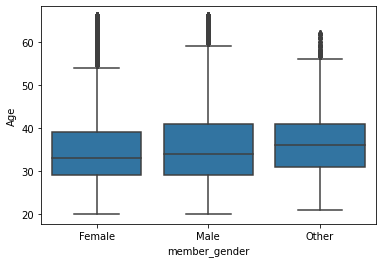

In [34]:
# plotting box plot 
sb.boxplot(data=df, x='member_gender', y='Age', color=color);

>Observation(4): Though not a huge difference, male riders tend to have shorter trips compared to female users, indicated by both a smaller median and shorter IQR.  


### What is the distriputaion of start hour depending on user type   ? 

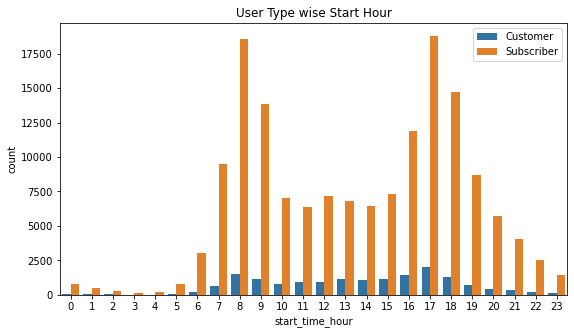

In [35]:
# clustered bar chart, absolute counts
plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 1)
sb.countplot(data = df, x = 'start_time_hour', hue = 'user_type')
plt.legend();
plt.title('User Type wise Start Hour');


> Observation(5): Subscribers take trips mostly during 8-9 am and 4-6 pm which is usually working hours of a company.

### What is the relation user type and time of trip  ? 

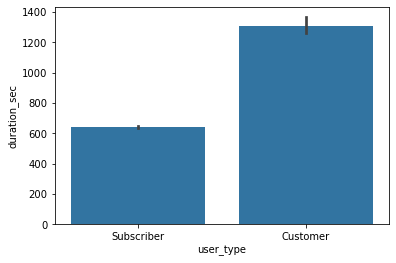

In [36]:
# making the order of user type 
o = df.user_type.value_counts().index
sb.barplot(y='duration_sec' , x='user_type' ,data=df , color=color , order=o);

> Observation(6): Customers users spend more time than subscriber users 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There are a lot more subscriber usage than customers. The riding habit/pattern varies a lot between subscribers and customers. Subscribers use the bike sharing system for work commnute thus most trips were on work days (Mon-Fri) and especially during rush hours (when going to work in the morning and getting off work in the afternoon), whereas customers tend to ride for fun in the afternoon or early evenings over weekends.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It is interesting to see that subscribers are slightly older than customers on average but take much shorter/quicker rides. And October had the most bike riding usage for subscribers throughout the year.

<a id='multivariate'></a>
## Multivariate Exploration

> I created plots of three or more variables to investigate the Ford Go Bike data even further.

### What is the average trip duration variation in weekdays between customers and subscribers ?

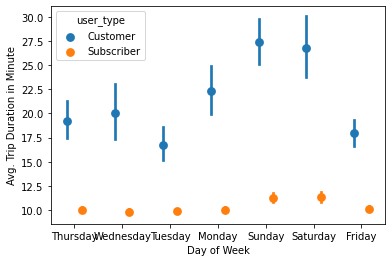

In [37]:
sb.pointplot(data=df, x='start_time_weekday', y='duration_min', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

>Observation(1): It can be seen from the above plot that subscribers ride much shorter/quicker trips compared to customers on each day of the week.

### what is the relation between trips taken by customers and subscribers on weekdays and weekends ? 

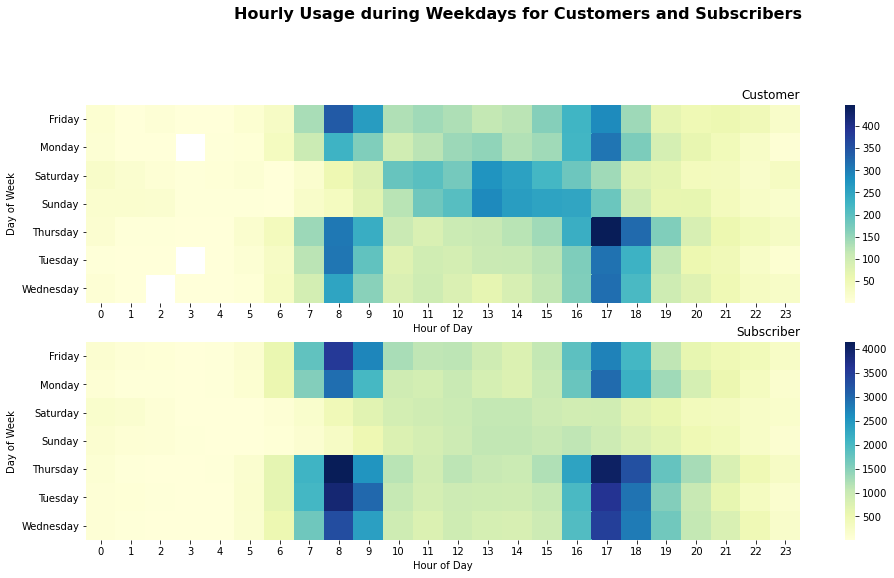

In [38]:
plt.figure(figsize = (16,8));
plt.subplot(2, 1, 1)
customers = df.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_time_weekday', 'start_time_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_time_weekday', columns='start_time_hour', values='count')
sb.heatmap(ct_counts, cmap='YlGnBu');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');


plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers', y=1.05, fontsize=16, fontweight='bold');

plt.subplot(2, 1, 2);
subscribers = df.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_time_weekday', 'start_time_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_time_weekday', columns='start_time_hour', values='count')
sb.heatmap(st_counts, cmap='YlGnBu');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

>Observation(2): we can see clearly the trips taken by customers and subscribers on weekdays and weekends.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The multivariate exploration strengthened some of the patterns discovered in the previous bivariate exploration as well as univariate exploration, the relationship between the multiple variables plotted are visualized altogether and information are presented combined. The efficient/short period of usage for subscribers corresponds to their high concentration on rush hours Monday through Friday, indicating the use is primarily for work commute. The more relaxing and flexible pattern of customer use shows that they're taking advantage of the bike sharing system quite differently from the subscribers, heavily over weekends and in the afternoon, for city tour or leisure purpose probably.        

### Were there any interesting or surprising interactions between features?

The interactions between features are all supplementing each other and quite make sense when looked at combined, there's no big surprise observed. The usage habit difference between male and female is not that much or obvious throughout the exploration, which could be related to the imbalanced number of female riders/records compared to male ones. It'd be interesting to see how male and female use the system differently if there were more female data.    

<a id='summary'></a>
## Summary

- Renting a bike from theFord GoBike System is a fantastic (healthy and environmentally friendly) way of moving around in the city, both for enjoyment and work. There are two types of clients using the system: Subscribers and Customers. Subscribers are primarily daily commuters, having short trips to and from work, who rent a bike on weekdays at 8-9am and 5-6pm, and, occasionally around lunch time. Customers are usually tourists or occassional riders who use the system mainly on weekends to explore the Bay Area.